In [1]:


import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

from keras.datasets import cifar10
from keras import layers
from keras.models import Model


2.18.0


# Exercise 1

Data Preprocessing and Data Normalization

x_train shape: (48000, 32, 32, 3)
y_train shape: (48000, 1)
x_val shape: (6000, 32, 32, 3)
y_val shape: (6000, 1)
x_test shape: (6000, 32, 32, 3)
y_test shape: (6000, 1)


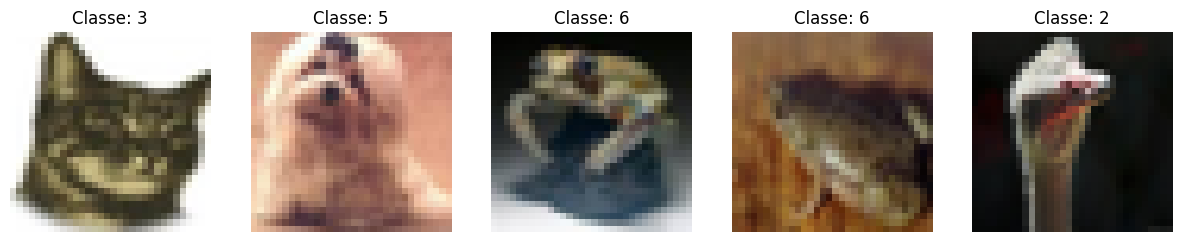

In [ ]:


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Data Splitting
x_data = np.concatenate((x_train, x_test), axis=0)
y_data = np.concatenate((y_train, y_test), axis=0)

x_train, x_temp, y_train, y_temp = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


#Data Normalization
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

num_images = 5 
plt.figure(figsize=(15, 3))

for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_train[i])
    plt.title(f'Classe: {y_train[i][0]}')
    plt.axis('off')

plt.show()



Network Definition

In [ ]:

input = layers.Input(shape=(32, 32, 3))

# Encoder
x = layers.Conv2D(8, (3, 3), strides=1, activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(12, (3, 3), strides=1, activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(16, (3, 3), strides=1, activation="relu", padding="same")(x)

# Decoder
x = layers.UpSampling2D(size=(2, 2))(x)  
x = layers.Conv2DTranspose(12, (3, 3), activation="relu", padding="same")(x)
x = layers.UpSampling2D(size=(2, 2))(x)  
x = layers.Conv2DTranspose(3, (3, 3), activation="relu", padding="same")(x)

autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="mean_squared_error")
autoencoder.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 32, 32, 8)      │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 16, 16, 12)     │           876 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 12)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 16)       │         1,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_8 (UpSampling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 16, 16, 12)     │         1,740 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_9 (UpSampling2D)  │ (None, 32, 32, 12)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_6              │ (None, 32, 32, 3)      │           327 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,911 (19.18 KB)

 Trainable params: 4,911 (19.18 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
from tensorflow.keras.utils import plot_model

plot_model(autoencoder, to_file="AdvanceMachineLearning\CAE-1", show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) for `plot_model` to work.


Training

In [ ]:
history = autoencoder.fit(
    x=x_train,
    y=x_train,
    epochs=20,
    batch_size=128,
    shuffle=True,
    validation_data=(x_val, x_val)
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.0678 - val_loss: 0.0104
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0095 - val_loss: 0.0078
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0075 - val_loss: 0.0069
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0067 - val_loss: 0.0063
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0062 - val_loss: 0.0060
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0059 - val_loss: 0.0058
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - loss: 0.0057 - val_loss: 0.0056
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0055 - val_loss: 0.0055
Epoch 9/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0054 - val_loss: 0.0053
Epoch 10/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0053 - val_loss: 0.0052
Epoch 11/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0051 - val_loss: 0.0051
Epoch 12/20
375/375 ━━━━━━━━━━━━━━━━━━━━

Training Losses: [0.02182556875050068, 0.009140167385339737, 0.007484075613319874, 0.006665539927780628, 0.006230476312339306, 0.005926408339291811, 0.005698165390640497, 0.005504575092345476, 0.005367746576666832, 0.005226016975939274, 0.005122538190335035, 0.005020038690418005, 0.004942275583744049, 0.004858218599110842, 0.004802180919796228, 0.004749316722154617, 0.004696278367191553, 0.004648052621632814, 0.0046073500998318195, 0.004573861602693796]
Validation Losses: [0.010653570294380188, 0.008140632882714272, 0.007010819856077433, 0.0066094775684177876, 0.006116241682320833, 0.005841253325343132, 0.005641803611069918, 0.005462142173200846, 0.005317056085914373, 0.005191822070628405, 0.005122045055031776, 0.0050134980119764805, 0.004932982847094536, 0.004870370030403137, 0.004801352042704821, 0.004826860502362251, 0.004716323222965002, 0.004732102155685425, 0.004659067373722792, 0.004578237421810627]


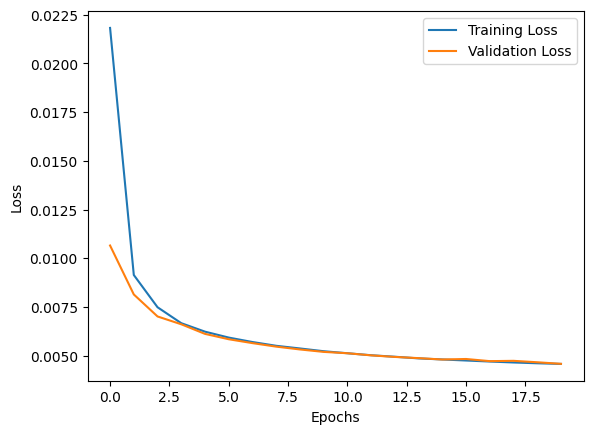

In [45]:
train_loss = history.history['loss']  
val_loss = history.history['val_loss']  

print("Training Losses:", train_loss)
print("Validation Losses:", val_loss)

plt.plot(history.epoch, train_loss, label='Training Loss')
plt.plot(history.epoch, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0625271].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.035456862..1.1172259].


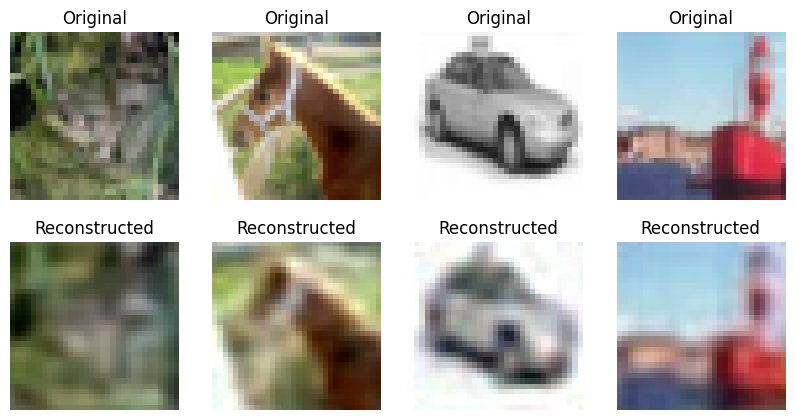

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [61]:
import matplotlib.pyplot as plt

def display_images(original_images, reconstructed_images, n=4):

    plt.figure(figsize=(10, 5))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        ax.imshow(original_images[i])  
        ax.axis('off')
        ax.set_title('Original')
        ax = plt.subplot(2, n, i + 1 + n)
        ax.imshow(reconstructed_images[i])  
        ax.axis('off') 
        ax.set_title('Reconstructed')

    plt.show()

predictions = autoencoder.predict(x_test)

display_images(x_test, predictions, n=4)


predictions = autoencoder.predict(x_test)


# Exercise 2

In [ ]:
! pip install optuna
import optuna
from keras import layers, Model
from optuna.visualization import plot_optimization_history, plot_parallel_coordinate, plot_param_importances

def objective(trial):
    global best_model
    # Define the hyperparameter search space
    num_layers = trial.suggest_int("num_layers", 2, 4)
    base_filters = trial.suggest_categorical("base_filters", [8, 16, 32])
    kernel_size = trial.suggest_categorical("kernel_size", [(3, 3), (5, 5)])
    latent_compression = trial.suggest_float("latent_compression", 0.25, 0.5)

    input_layer = layers.Input(shape=(32, 32, 3))
    x = input_layer
    filters = base_filters

    # Encoder
    for _ in range(num_layers):
        x = layers.Conv2D(filters, kernel_size, activation="relu", padding="same")(x)
        x = layers.MaxPooling2D((2, 2), padding="same")(x)
        filters *= 2

    # Latent space
    x = layers.Conv2D(int(filters * latent_compression), kernel_size, activation="relu", padding="same")(x)

    # Decoder
    for _ in range(num_layers):
        filters //= 2
        x = layers.UpSampling2D((2, 2))(x)
        x = layers.Conv2DTranspose(filters, kernel_size, activation="relu", padding="same")(x)

    # Output layer
    output_layer = layers.Conv2DTranspose(3, (3, 3), activation="sigmoid", padding="same")(x)

    # Model
    model = Model(input_layer, output_layer)
    model.compile(optimizer="adam", loss="mean_squared_error")

    # Train
    history = model.fit(
        x_train,
        x_train,
        validation_data=(x_val, x_val),
        epochs=10,
        batch_size=128,
        verbose=0
    )

    val_loss = history.history["val_loss"][-1]
    if study.best_trial is None or val_loss < study.best_value:
      best_model = model  # Save the best model

    return val_loss

# Create a study and log progress
def logging_callback(study, trial):
    print(f"Trial {trial.number}: Value = {trial.value}, Params = {trial.params}")

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10, callbacks=[logging_callback])

# Visualize optimization history
plot_optimization_history(study)

# Additional visualizations
plot_parallel_coordinate(study)
plot_param_importances(study)


In [ ]:
best_model.save("best_autoencoder_model.h5")


In [ ]:
# Use the best model for predictions
predictions = best_model.predict(x_val[:5])

def display_images(original_images, reconstructed_images, n=5):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 5))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original_images[i])
        plt.title("Original")
        plt.axis("off")

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed_images[i])
        plt.title("Reconstructed")
        plt.axis("off")
    plt.show()

display_images(x_val[:5], predictions)



In [ ]:

test_loss = best_model.evaluate(x_test, x_test)
print("Test loss:", test_loss)


# Exercise 3

Images Preprocessing

x_train shape: (48000, 32, 32, 3)
y_train shape: (48000, 1)
x_val shape: (6000, 32, 32, 3)
y_val shape: (6000, 1)
x_test shape: (6000, 32, 32, 3)
y_test shape: (6000, 1)


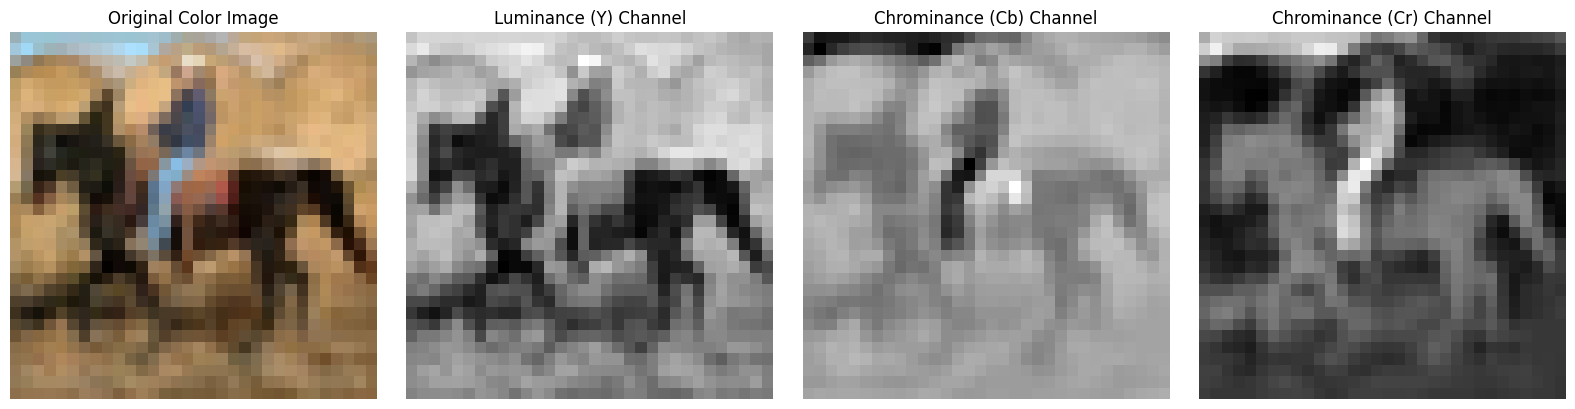

In [4]:
import numpy as np
import cv2
from tensorflow.keras.models import Model
from tensorflow.keras import layers
import matplotlib.pyplot as plt  # Assicurati che Matplotlib sia importato


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_data = np.concatenate((x_train, x_test), axis=0)
y_data = np.concatenate((y_train, y_test), axis=0)

x_train, x_temp, y_train, y_temp = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


def rgb_to_ycbcr(rgb_image):
    ycbcr_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2YCrCb)
    y, cb, cr = cv2.split(ycbcr_image)
    return y, cb, cr

x_train_y, x_train_cb, x_train_cr = [], [], []
x_test_y, x_test_cb, x_test_cr = [], [], []
x_val_y, x_val_cb, x_val_cr = [], [], []

for img in x_train:
    y, cb, cr = rgb_to_ycbcr(img)
    x_train_y.append(y)
    x_train_cb.append(cb)
    x_train_cr.append(cr)

for img in x_test:
    y, cb, cr = rgb_to_ycbcr(img)
    x_test_y.append(y)
    x_test_cb.append(cb)
    x_test_cr.append(cr)

for img in x_val:
    y, cb, cr = rgb_to_ycbcr(img)
    x_val_y.append(y)
    x_val_cb.append(cb)
    x_val_cr.append(cr)

x_train_y = np.array(x_train_y)
x_train_cb = np.array(x_train_cb)
x_train_cr = np.array(x_train_cr)

x_test_y = np.array(x_test_y)
x_test_cb = np.array(x_test_cb)
x_test_cr = np.array(x_test_cr)

x_val_y = np.array(x_val_y)
x_val_cb = np.array(x_val_cb)
x_val_cr = np.array(x_val_cr)

y_train = np.stack([x_train_cb, x_train_cr], axis=-1)
y_test = np.stack([x_test_cb, x_test_cr], axis=-1)
y_val = np.stack([x_val_cb, x_val_cr], axis=-1)


fig, axes = plt.subplots(1, 4, figsize=(16, 4))

axes[0].imshow(x_test[4])  
axes[0].set_title("Original Color Image")
axes[0].axis("off")

axes[1].imshow(x_test_y[4], cmap='gray') 
axes[1].set_title("Luminance (Y) Channel")
axes[1].axis("off")

axes[2].imshow(x_test_cb[4], cmap='gray') 
axes[2].set_title("Chrominance (Cb) Channel")
axes[2].axis("off")

axes[3].imshow(x_test_cr[4], cmap='gray')  
axes[3].set_title("Chrominance (Cr) Channel")
axes[3].axis("off")

plt.tight_layout()
plt.show()





Network Definition

In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Input
from tensorflow.keras.optimizers import Adam

input_img = Input(shape=(32, 32, 1))
#Encoder
x = layers.Conv2D(8, (3, 3), strides=1, activation="relu", padding="same")(input_img)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(12, (3, 3), strides=1, activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(16, (3, 3), strides=1, activation="relu", padding="same")(x)

# Decoder
x = layers.UpSampling2D(size=(2, 2))(x)  
x = layers.Conv2DTranspose(12, (3, 3), activation="relu", padding="same")(x)
x = layers.UpSampling2D(size=(2, 2))(x)  
output_cbcr = layers.Conv2D(2, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, output_cbcr)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.summary()



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 12)     │           876 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 12)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 16)       │         1,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 16, 16, 12)     │         1,740 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 32, 32, 12)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 2)      │           218 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,658 (18.20 KB)

 Trainable params: 4,658 (18.20 KB)

 Non-trainable params: 0 (0.00 B)

Training

In [6]:
history = autoencoder.fit(
    x_train_y, y_train,
    epochs=25, 
    batch_size=64,
    validation_data=(x_val_y, y_val)
)


Epoch 1/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.0033 - val_loss: 0.0030
Epoch 2/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 3/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 4/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 5/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 6/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 7/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 8/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 9/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 10/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 11/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 12/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/s

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.022310756..0.7711431].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.025073236..1.0180309].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.06439982..1.0126259].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.035598353..0.8832403].


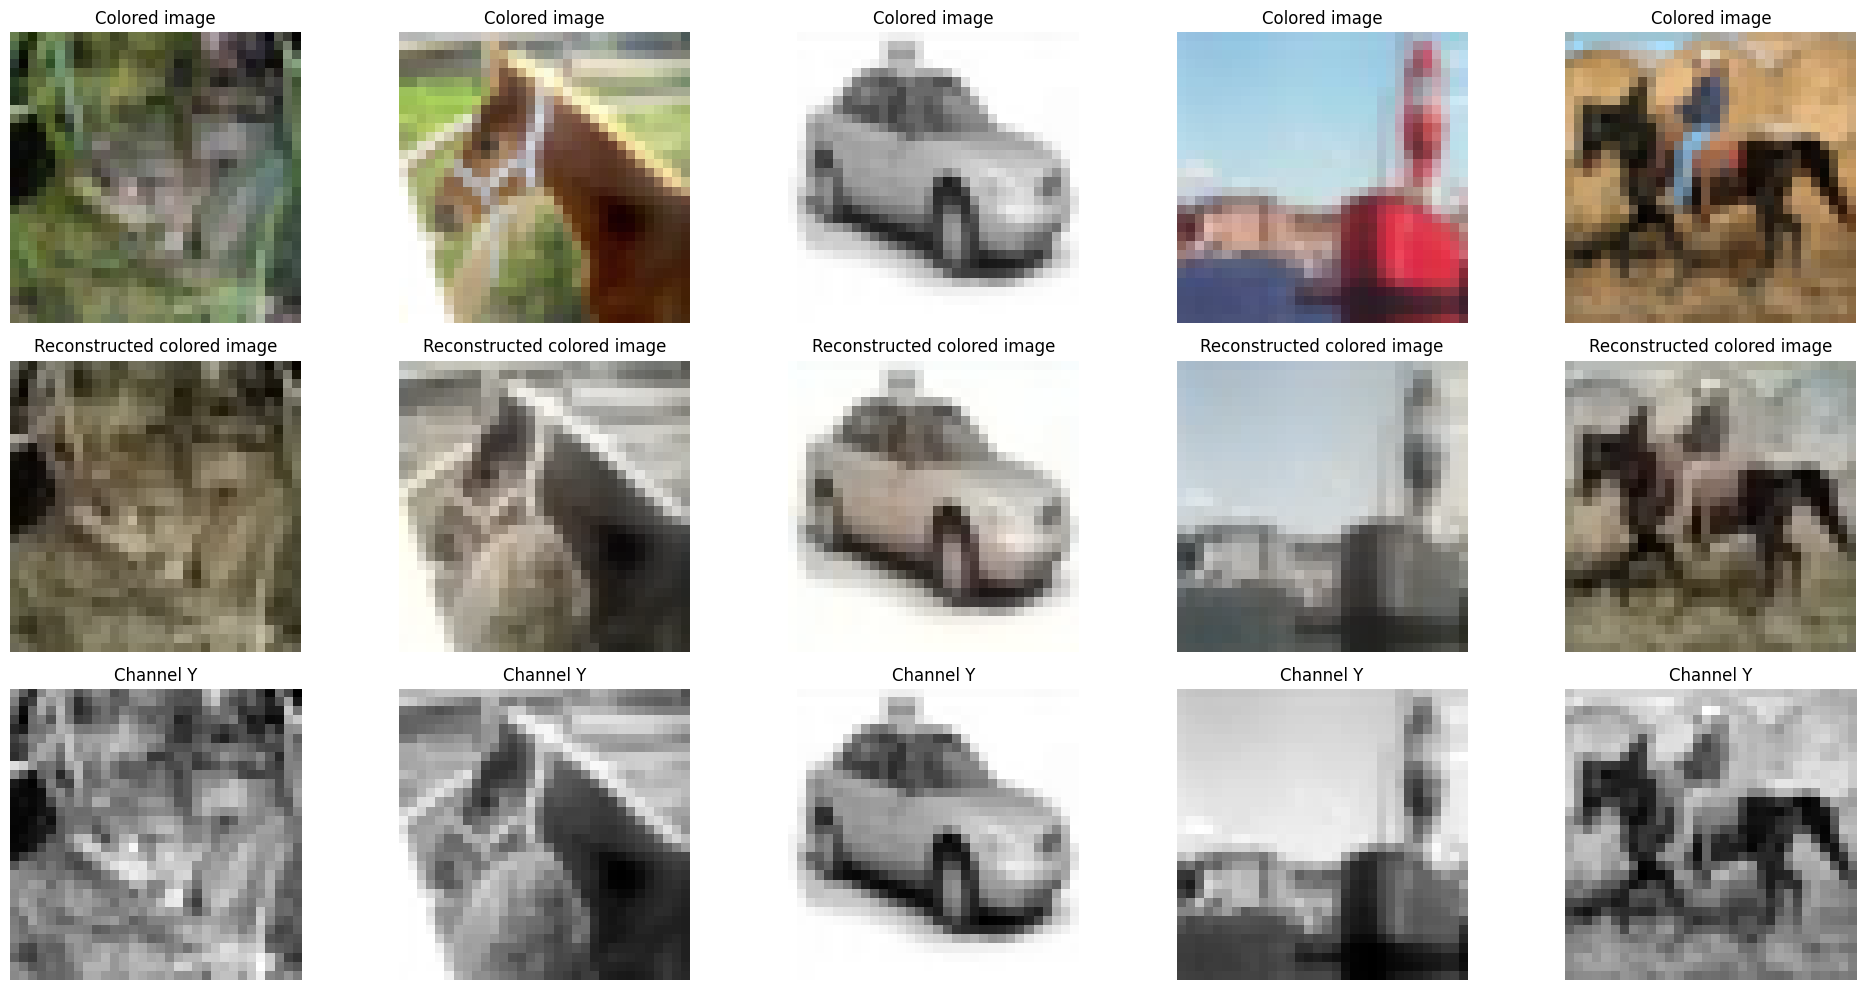

In [11]:
predicted_cbcr = autoencoder.predict(x_test_y)

reconstructed_images = []
for i in range(len(x_test_y)):
    y_channel = x_test_y[i].squeeze()  
    cb_channel = predicted_cbcr[i, ..., 0]
    cr_channel = predicted_cbcr[i, ..., 1]
    
    ycbcr_image = cv2.merge([y_channel, cb_channel, cr_channel])
    rgb_image = cv2.cvtColor(ycbcr_image, cv2.COLOR_YCrCb2RGB)
    reconstructed_images.append(rgb_image)


plt.figure(figsize=(20, 10))

for i in range(5):
    # Visualizzazione delle immagini originali con colori
    plt.subplot(3, 5, i+1)
    plt.imshow(x_test[i])
    plt.title("Colored image")
    plt.axis('off')

    # Visualizzazione della ricostruzione a colori
    plt.subplot(3, 5, i+6)
    plt.imshow(reconstructed_images[i])
    plt.title("Reconstructed colored image")
    plt.axis('off')

    # Visualizzazione del canale Y in bianco e nero
    plt.subplot(3, 5, i+11)
    plt.imshow(x_test_y[i].squeeze(), cmap='gray')
    plt.title("Channel Y")
    plt.axis('off')

plt.tight_layout()
plt.show()


